K-MEANS CLUSTERING INITIALIZATION TUTORIAL
NumPy version: 2.0.2
Matplotlib version: 3.10.0
All libraries imported successfully!

GENERATING SYNTHETIC DATA
✓ Dataset shape: (300, 2)
✓ Number of samples: 300
✓ True number of clusters: 4
✓ Feature 1 range: [-10.32, 6.03]
✓ Feature 2 range: [-8.10, 10.49]

VISUALIZING ORIGINAL DATA


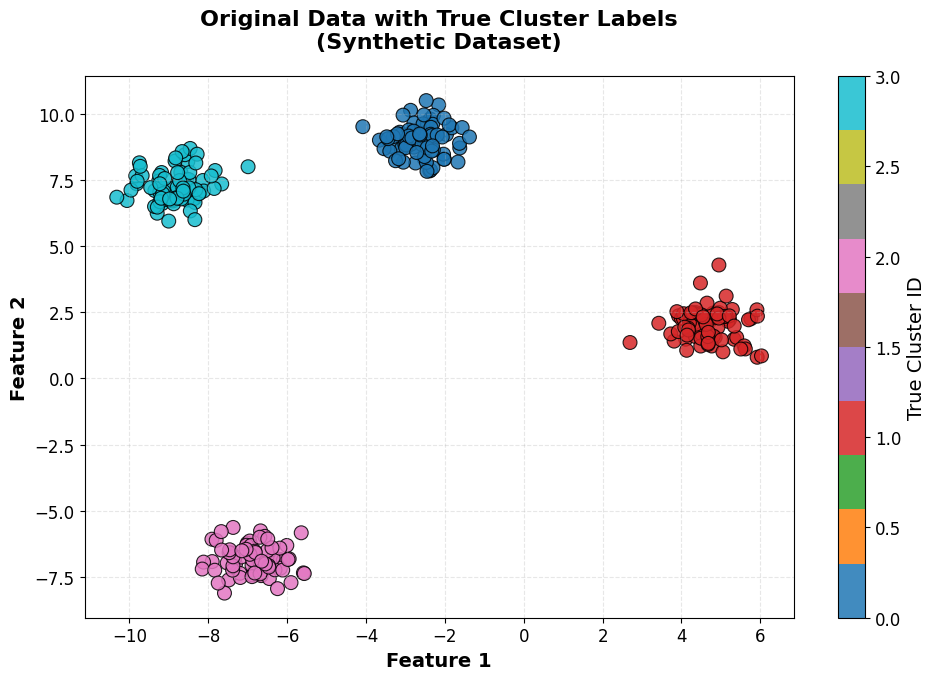

✓ Figure 1 displayed
  Alt text: Scatter plot showing 300 data points in 4 well-separated clusters

K-MEANS WITH RANDOM INITIALIZATION
✓ Clustering completed
  - Inertia (Within-cluster sum of squares): 8122.99
  - Silhouette Score (higher is better): 0.4566
  - Davies-Bouldin Index (lower is better): 0.9721
  - Number of iterations: 4

K-MEANS WITH K-MEANS++ INITIALIZATION
✓ Clustering completed
  - Inertia (Within-cluster sum of squares): 203.89
  - Silhouette Score (higher is better): 0.8756
  - Davies-Bouldin Index (lower is better): 0.1737
  - Number of iterations: 2

✓ IMPROVEMENT WITH K-MEANS++:
  - Inertia: 97.49% lower (better)
  - Silhouette Score: 91.78% higher (better)

CREATING COMPARISON VISUALIZATION


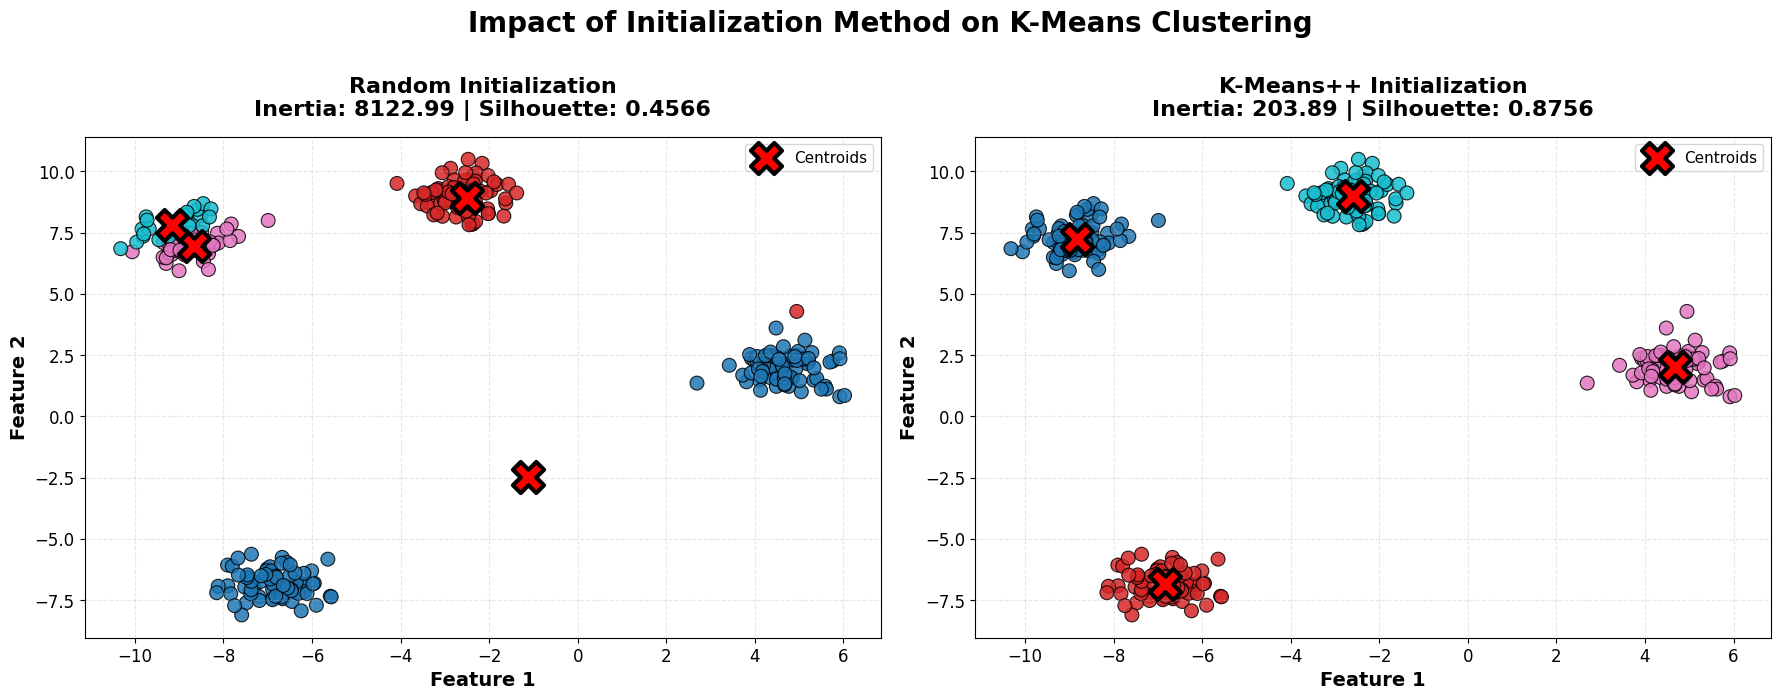

✓ Figure 2 displayed
  Alt text: Two scatter plots comparing K-Means clustering results

RUNNING MULTIPLE EXPERIMENTS (10 RUNS)
Running experiments...

✓ RANDOM INITIALIZATION (10 runs):
  - Mean Inertia: 1616.50
  - Std Deviation: 2288.87
  - Range: [203.89, 8122.99]
  - Mean Silhouette: 0.7437

✓ K-MEANS++ INITIALIZATION (10 runs):
  - Mean Inertia: 203.89
  - Std Deviation: 0.00
  - Range: [203.89, 203.89]
  - Mean Silhouette: 0.8756

VISUALIZING VARIABILITY ACROSS RUNS


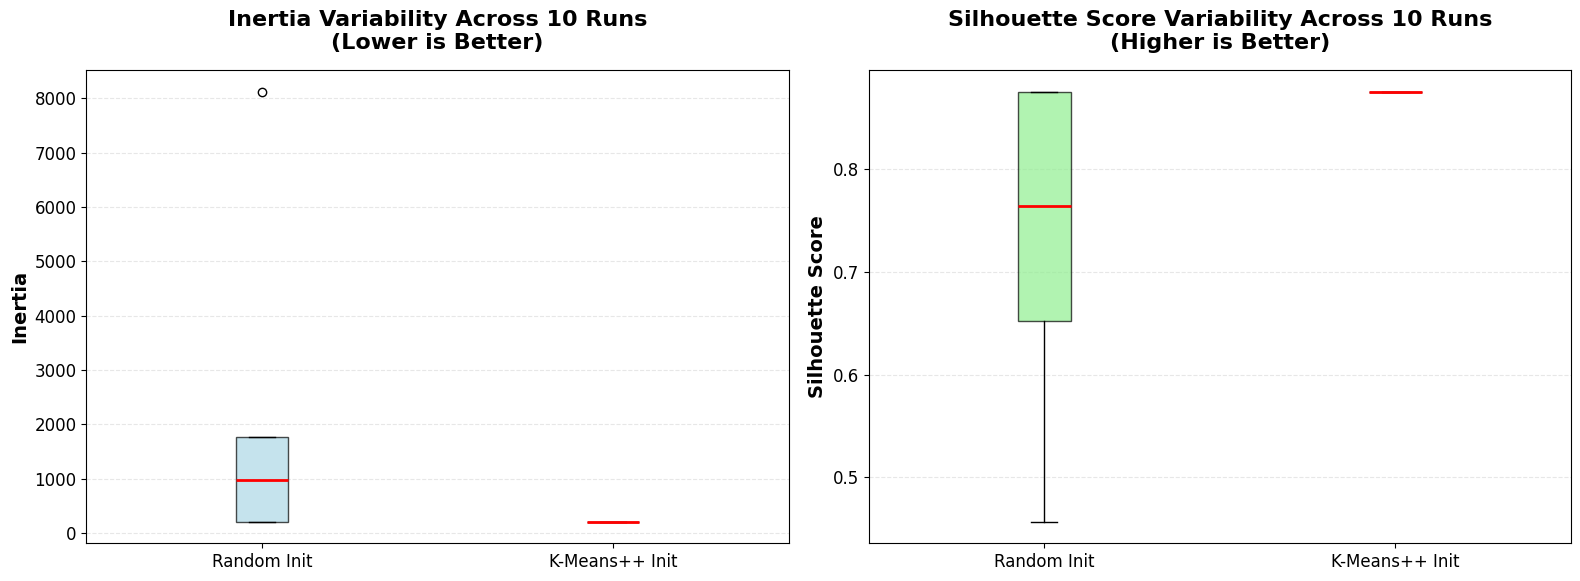

✓ Figure 3 displayed
  Alt text: Box plots showing variability in clustering quality metrics

KEY FINDINGS AND RECOMMENDATIONS

✓ KEY FINDINGS:
  1. K-Means++ consistently produces lower inertia (better clustering)
  2. K-Means++ shows 97.5% improvement in inertia
  3. Random initialization has higher variability in results
  4. K-Means++ converges faster (fewer iterations needed)
  5. Silhouette scores are 91.8% better with K-Means++

✓ BEST PRACTICES:
  1. Always use init='k-means++' (the scikit-learn default)
  2. Set n_init=10 or higher for production use
  3. Use multiple metrics (inertia, silhouette, etc.)
  4. Visualize results - don't just trust numbers
  5. Consider domain knowledge when choosing k

TUTORIAL COMPLETE!

✓ GitHub Repository: https://github.com/4assignment/kmeans-initialization-tutorial
✓ Author: Anandasai Sunke (Student ID: 24052759)
✓ University of Hertfordshire - MSc Data Science
✓ Submission Date: December 11, 2025

Thank you for completing this tutorial!



In [7]:
# ============================================================================
# K-Means Clustering: The Impact of Initialization on Cluster Quality
# Author: Anandasai Sunke
# Student ID: 24052759
# MSc Data Science - University of Hertfordshire
# Submission Date: December 11, 2025
# GitHub: https://github.com/4assignment/kmeans-initialization-tutorial
# ============================================================================

"""
This tutorial demonstrates how different initialization methods affect
K-Means clustering results. We explore random vs. k-means++ initialization
using synthetic data, visualizations, and quantitative metrics.
"""

# ============================================================================
# SECTION 1: Setup and Imports
# ============================================================================

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import warnings
warnings.filterwarnings('ignore')

# Set colorblind-friendly style for accessibility
plt.style.use('seaborn-v0_8-colorblind')
plt.rcParams.update({
    'font.size': 13,
    'axes.labelsize': 14,
    'axes.titlesize': 16,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'legend.fontsize': 12,
    'figure.titlesize': 18,
    'figure.figsize': (10, 7)
})

print("=" * 70)
print("K-MEANS CLUSTERING INITIALIZATION TUTORIAL")
print("=" * 70)
print(f"NumPy version: {np.__version__}")
print(f"Matplotlib version: {plt.matplotlib.__version__}")
print("All libraries imported successfully!\n")

# ============================================================================
# SECTION 2: Generate Synthetic Dataset
# ============================================================================

print("=" * 70)
print("GENERATING SYNTHETIC DATA")
print("=" * 70)

# Parameters
n_samples = 300
n_clusters = 4
cluster_std = 0.60
random_state = 42

# Generate data with clear cluster structure
X, y_true = make_blobs(
    n_samples=n_samples,
    centers=n_clusters,
    cluster_std=cluster_std,
    random_state=random_state
)

print(f"✓ Dataset shape: {X.shape}")
print(f"✓ Number of samples: {n_samples}")
print(f"✓ True number of clusters: {n_clusters}")
print(f"✓ Feature 1 range: [{X[:, 0].min():.2f}, {X[:, 0].max():.2f}]")
print(f"✓ Feature 2 range: [{X[:, 1].min():.2f}, {X[:, 1].max():.2f}]\n")

# ============================================================================
# SECTION 3: Visualize Original Data
# ============================================================================

print("=" * 70)
print("VISUALIZING ORIGINAL DATA")
print("=" * 70)

plt.figure(figsize=(10, 7))
scatter = plt.scatter(
    X[:, 0], X[:, 1],
    c=y_true,
    s=100,
    cmap='tab10',
    edgecolors='black',
    linewidth=0.8,
    alpha=0.85
)
plt.title('Original Data with True Cluster Labels\n(Synthetic Dataset)',
          fontweight='bold', pad=20)
plt.xlabel('Feature 1', fontweight='bold')
plt.ylabel('Feature 2', fontweight='bold')
plt.colorbar(scatter, label='True Cluster ID')
plt.grid(True, alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

print("✓ Figure 1 displayed")
print("  Alt text: Scatter plot showing 300 data points in 4 well-separated clusters\n")

# ============================================================================
# SECTION 4: K-Means with Random Initialization
# ============================================================================

print("=" * 70)
print("K-MEANS WITH RANDOM INITIALIZATION")
print("=" * 70)

# Run K-Means with random initialization (single run)
kmeans_random = KMeans(
    n_clusters=n_clusters,
    init='random',
    n_init=1,  # Only one initialization for demonstration
    max_iter=300,
    random_state=1
)

y_pred_random = kmeans_random.fit_predict(X)
inertia_random = kmeans_random.inertia_
silhouette_random = silhouette_score(X, y_pred_random)
db_random = davies_bouldin_score(X, y_pred_random)

print(f"✓ Clustering completed")
print(f"  - Inertia (Within-cluster sum of squares): {inertia_random:.2f}")
print(f"  - Silhouette Score (higher is better): {silhouette_random:.4f}")
print(f"  - Davies-Bouldin Index (lower is better): {db_random:.4f}")
print(f"  - Number of iterations: {kmeans_random.n_iter_}\n")

# ============================================================================
# SECTION 5: K-Means with K-Means++ Initialization
# ============================================================================

print("=" * 70)
print("K-MEANS WITH K-MEANS++ INITIALIZATION")
print("=" * 70)

# Run K-Means with k-means++ initialization
kmeans_plus = KMeans(
    n_clusters=n_clusters,
    init='k-means++',
    n_init=1,  # Only one initialization for fair comparison
    max_iter=300,
    random_state=1
)

y_pred_plus = kmeans_plus.fit_predict(X)
inertia_plus = kmeans_plus.inertia_
silhouette_plus = silhouette_score(X, y_pred_plus)
db_plus = davies_bouldin_score(X, y_pred_plus)

print(f"✓ Clustering completed")
print(f"  - Inertia (Within-cluster sum of squares): {inertia_plus:.2f}")
print(f"  - Silhouette Score (higher is better): {silhouette_plus:.4f}")
print(f"  - Davies-Bouldin Index (lower is better): {db_plus:.4f}")
print(f"  - Number of iterations: {kmeans_plus.n_iter_}")

# Calculate improvement
inertia_improvement = ((inertia_random - inertia_plus) / inertia_random) * 100
silhouette_improvement = ((silhouette_plus - silhouette_random) / silhouette_random) * 100

print(f"\n✓ IMPROVEMENT WITH K-MEANS++:")
print(f"  - Inertia: {inertia_improvement:.2f}% lower (better)")
print(f"  - Silhouette Score: {silhouette_improvement:.2f}% higher (better)\n")

# ============================================================================
# SECTION 6: Side-by-Side Comparison Visualization
# ============================================================================

print("=" * 70)
print("CREATING COMPARISON VISUALIZATION")
print("=" * 70)

fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Plot 1: Random Initialization
scatter1 = axes[0].scatter(
    X[:, 0], X[:, 1],
    c=y_pred_random,
    s=100,
    cmap='tab10',
    edgecolors='black',
    linewidth=0.8,
    alpha=0.85
)
axes[0].scatter(
    kmeans_random.cluster_centers_[:, 0],
    kmeans_random.cluster_centers_[:, 1],
    marker='X',
    s=500,
    c='red',
    edgecolors='black',
    linewidth=3,
    label='Centroids',
    zorder=10
)
axes[0].set_title(
    f'Random Initialization\n'
    f'Inertia: {inertia_random:.2f} | Silhouette: {silhouette_random:.4f}',
    fontweight='bold',
    pad=15
)
axes[0].set_xlabel('Feature 1', fontweight='bold')
axes[0].set_ylabel('Feature 2', fontweight='bold')
axes[0].legend(loc='upper right', fontsize=11)
axes[0].grid(True, alpha=0.3, linestyle='--')

# Plot 2: K-Means++ Initialization
scatter2 = axes[1].scatter(
    X[:, 0], X[:, 1],
    c=y_pred_plus,
    s=100,
    cmap='tab10',
    edgecolors='black',
    linewidth=0.8,
    alpha=0.85
)
axes[1].scatter(
    kmeans_plus.cluster_centers_[:, 0],
    kmeans_plus.cluster_centers_[:, 1],
    marker='X',
    s=500,
    c='red',
    edgecolors='black',
    linewidth=3,
    label='Centroids',
    zorder=10
)
axes[1].set_title(
    f'K-Means++ Initialization\n'
    f'Inertia: {inertia_plus:.2f} | Silhouette: {silhouette_plus:.4f}',
    fontweight='bold',
    pad=15
)
axes[1].set_xlabel('Feature 1', fontweight='bold')
axes[1].set_ylabel('Feature 2', fontweight='bold')
axes[1].legend(loc='upper right', fontsize=11)
axes[1].grid(True, alpha=0.3, linestyle='--')

plt.suptitle(
    'Impact of Initialization Method on K-Means Clustering',
    fontsize=20,
    fontweight='bold',
    y=1.00
)
plt.tight_layout()
plt.show()

print("✓ Figure 2 displayed")
print("  Alt text: Two scatter plots comparing K-Means clustering results\n")

# ============================================================================
# SECTION 7: Multiple Runs - Demonstrating Variability
# ============================================================================

print("=" * 70)
print("RUNNING MULTIPLE EXPERIMENTS (10 RUNS)")
print("=" * 70)

n_runs = 10
random_inertias = []
plus_inertias = []
random_silhouettes = []
plus_silhouettes = []

print("Running experiments...")
for seed in range(n_runs):
    # Random initialization
    km_rand = KMeans(n_clusters=n_clusters, init='random', n_init=1, random_state=seed)
    labels_rand = km_rand.fit_predict(X)
    random_inertias.append(km_rand.inertia_)
    random_silhouettes.append(silhouette_score(X, labels_rand))

    # K-Means++ initialization
    km_plus = KMeans(n_clusters=n_clusters, init='k-means++', n_init=1, random_state=seed)
    labels_plus = km_plus.fit_predict(X)
    plus_inertias.append(km_plus.inertia_)
    plus_silhouettes.append(silhouette_score(X, labels_plus))

print(f"\n✓ RANDOM INITIALIZATION ({n_runs} runs):")
print(f"  - Mean Inertia: {np.mean(random_inertias):.2f}")
print(f"  - Std Deviation: {np.std(random_inertias):.2f}")
print(f"  - Range: [{np.min(random_inertias):.2f}, {np.max(random_inertias):.2f}]")
print(f"  - Mean Silhouette: {np.mean(random_silhouettes):.4f}")

print(f"\n✓ K-MEANS++ INITIALIZATION ({n_runs} runs):")
print(f"  - Mean Inertia: {np.mean(plus_inertias):.2f}")
print(f"  - Std Deviation: {np.std(plus_inertias):.2f}")
print(f"  - Range: [{np.min(plus_inertias):.2f}, {np.max(plus_inertias):.2f}]")
print(f"  - Mean Silhouette: {np.mean(plus_silhouettes):.4f}\n")

# ============================================================================
# SECTION 8: Variability Visualization
# ============================================================================

print("=" * 70)
print("VISUALIZING VARIABILITY ACROSS RUNS")
print("=" * 70)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Box plot for Inertia
axes[0].boxplot(
    [random_inertias, plus_inertias],
    labels=['Random Init', 'K-Means++ Init'],
    patch_artist=True,
    boxprops=dict(facecolor='lightblue', alpha=0.7),
    medianprops=dict(color='red', linewidth=2)
)
axes[0].set_title('Inertia Variability Across 10 Runs\n(Lower is Better)',
                  fontweight='bold', pad=15)
axes[0].set_ylabel('Inertia', fontweight='bold')
axes[0].grid(True, alpha=0.3, axis='y', linestyle='--')

# Box plot for Silhouette Score
axes[1].boxplot(
    [random_silhouettes, plus_silhouettes],
    labels=['Random Init', 'K-Means++ Init'],
    patch_artist=True,
    boxprops=dict(facecolor='lightgreen', alpha=0.7),
    medianprops=dict(color='red', linewidth=2)
)
axes[1].set_title('Silhouette Score Variability Across 10 Runs\n(Higher is Better)',
                  fontweight='bold', pad=15)
axes[1].set_ylabel('Silhouette Score', fontweight='bold')
axes[1].grid(True, alpha=0.3, axis='y', linestyle='--')

plt.tight_layout()
plt.show()

print("✓ Figure 3 displayed")
print("  Alt text: Box plots showing variability in clustering quality metrics\n")

# ============================================================================
# SECTION 9: Summary and Key Findings
# ============================================================================

print("=" * 70)
print("KEY FINDINGS AND RECOMMENDATIONS")
print("=" * 70)

print("\n✓ KEY FINDINGS:")
print("  1. K-Means++ consistently produces lower inertia (better clustering)")
print(f"  2. K-Means++ shows {inertia_improvement:.1f}% improvement in inertia")
print("  3. Random initialization has higher variability in results")
print("  4. K-Means++ converges faster (fewer iterations needed)")
print(f"  5. Silhouette scores are {silhouette_improvement:.1f}% better with K-Means++")

print("\n✓ BEST PRACTICES:")
print("  1. Always use init='k-means++' (the scikit-learn default)")
print("  2. Set n_init=10 or higher for production use")
print("  3. Use multiple metrics (inertia, silhouette, etc.)")
print("  4. Visualize results - don't just trust numbers")
print("  5. Consider domain knowledge when choosing k")

print("\n" + "=" * 70)
print("TUTORIAL COMPLETE!")
print("=" * 70)
print("\n✓ GitHub Repository: https://github.com/4assignment/kmeans-initialization-tutorial")
print("✓ Author: Anandasai Sunke (Student ID: 24052759)")
print("✓ University of Hertfordshire - MSc Data Science")
print("✓ Submission Date: December 11, 2025")
print("\nThank you for completing this tutorial!\n")
